<a href="https://colab.research.google.com/github/VersaFeodora/coursework-machine-learning-python/blob/main/Coursework_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Preparation

In [ ]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#import dataset
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


## Data Visualization

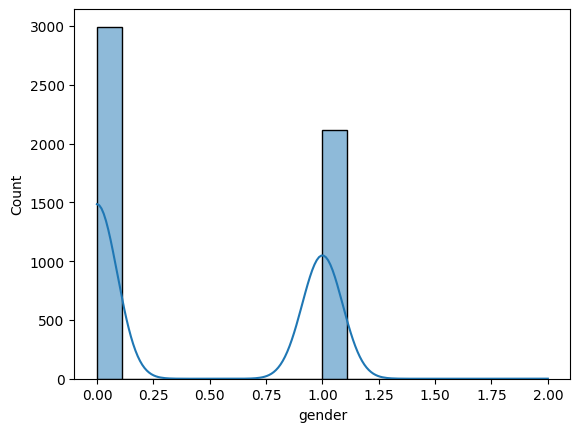

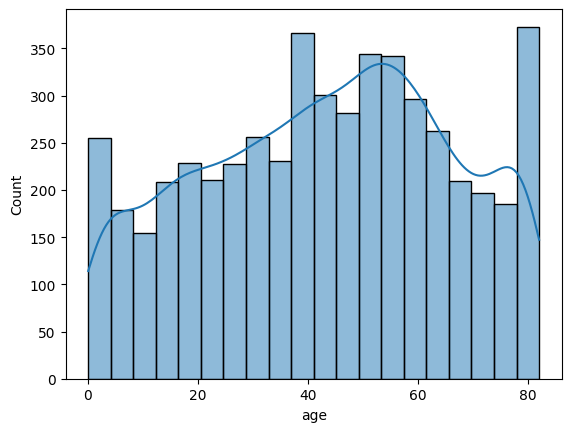

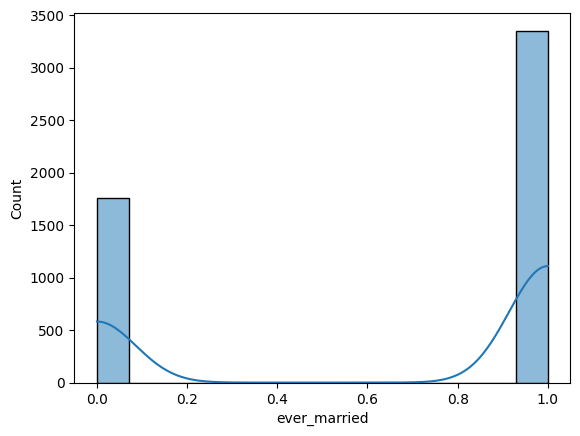

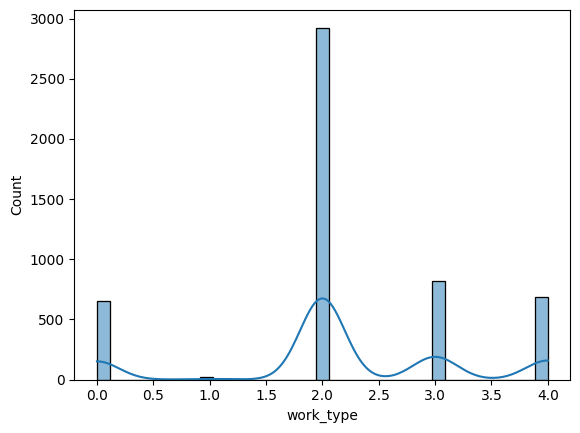

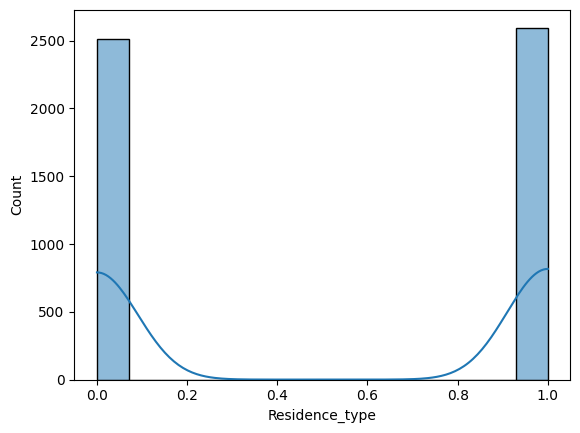

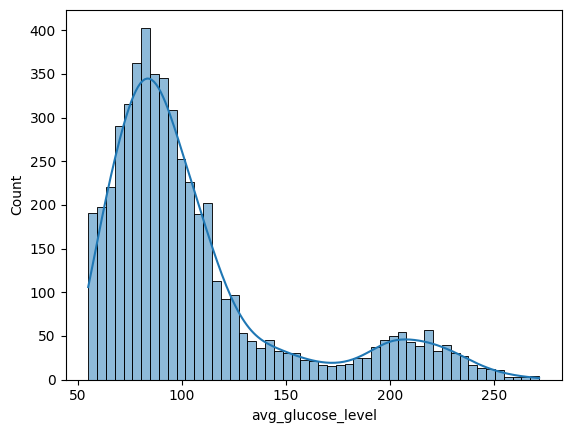

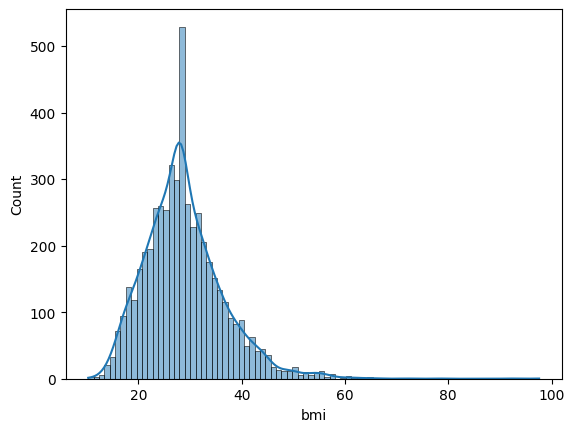

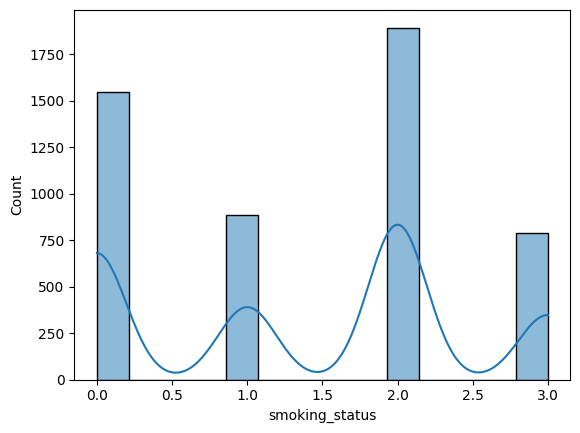

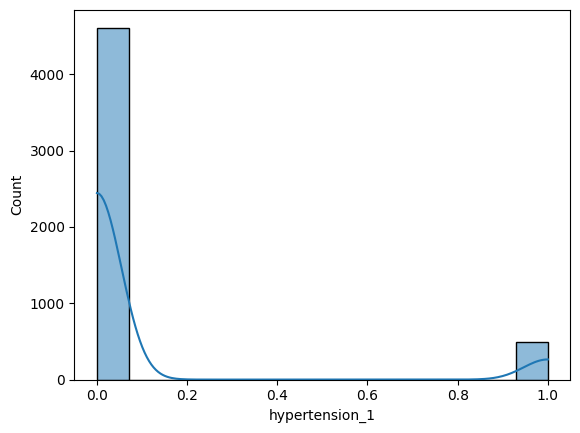

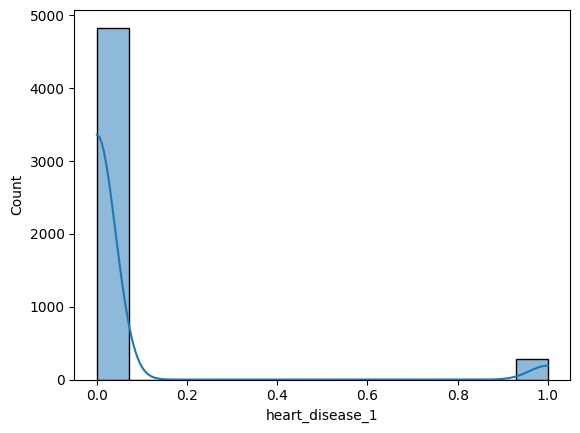

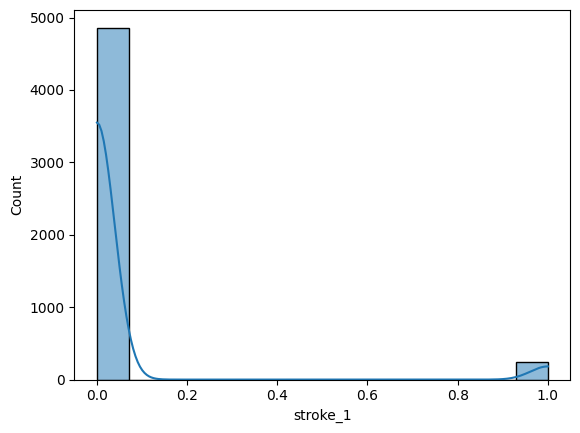

In [ ]:
#histogram plots for each parameter
for i, col in enumerate(df.columns):
    plt.figure(i)
    sns.histplot(df[col], kde=True)

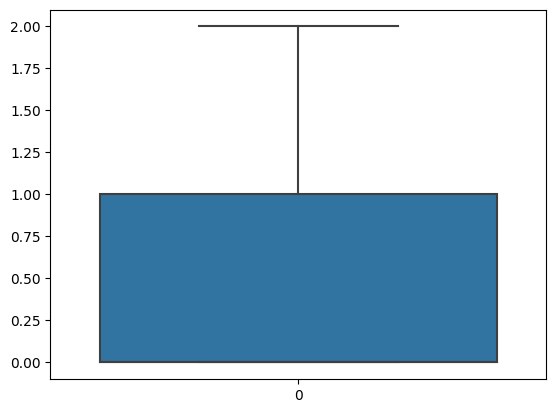

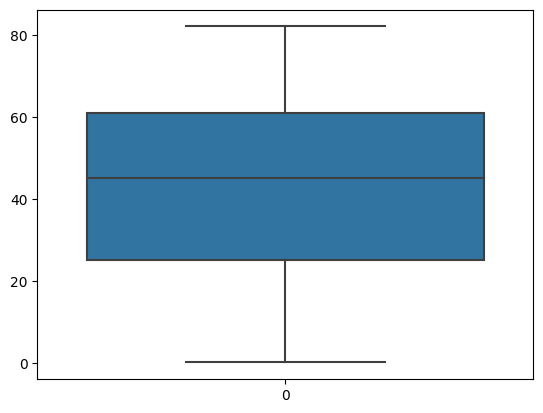

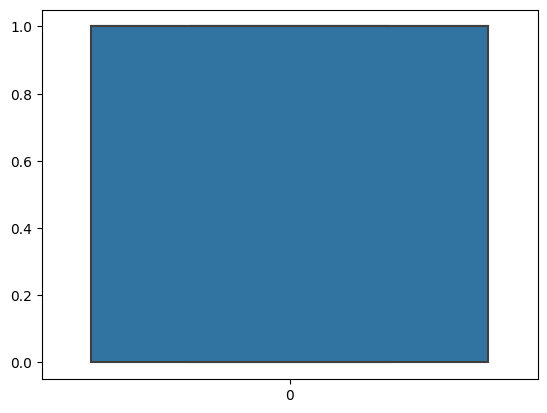

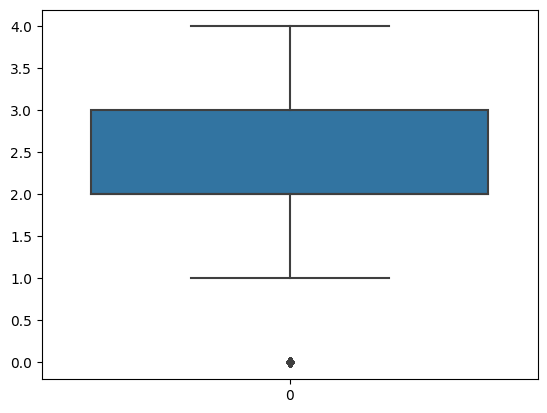

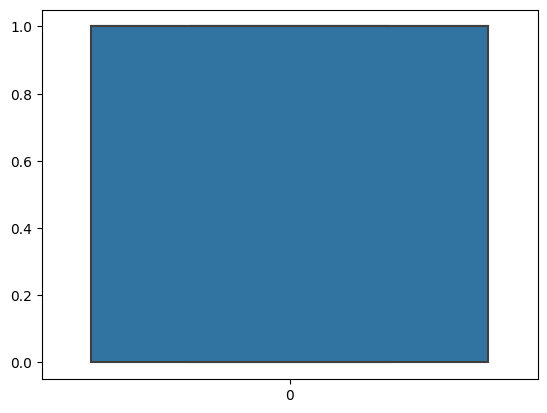

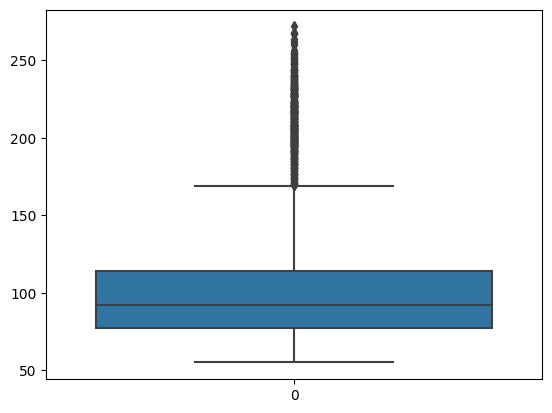

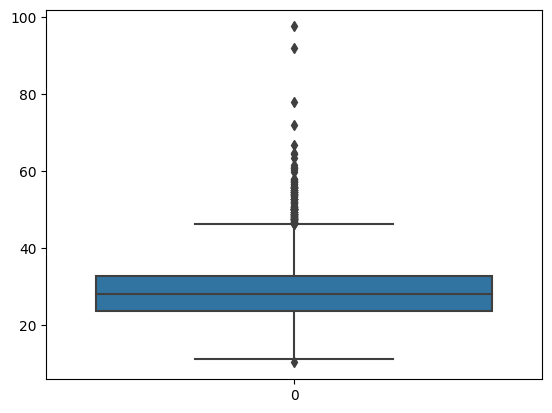

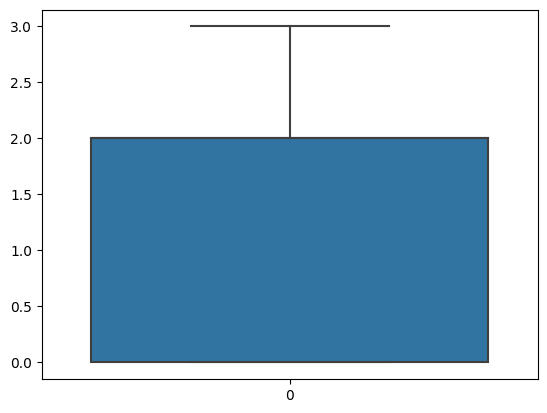

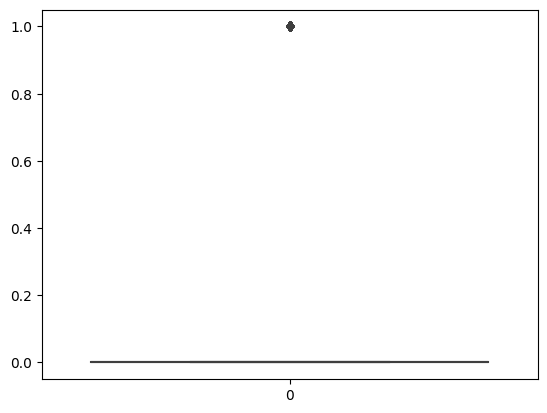

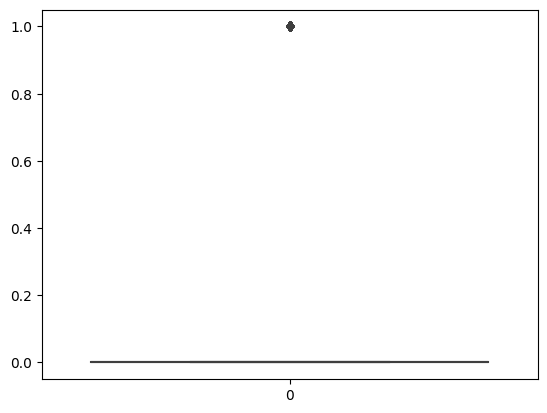

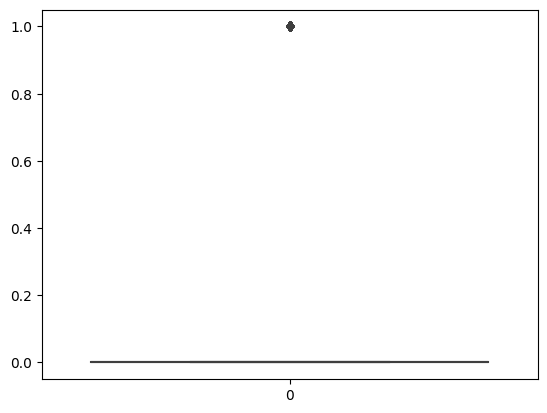

In [ ]:
#boxplot for each parameter
for i, col in enumerate(df.columns):
    plt.figure(i)
    sns.boxplot(df[col])

Based on the boxplot and histogram above, the parameter that has many outliers and possibly skewed are:
- avg_glucose
- bmi

## Pre Processing

In [ ]:
#Drop unrelated parameter (id)
df = df.drop(['id'], axis=1)

In [ ]:
#finding null values within dataset
print(df.isna().sum())

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [ ]:
#fill in N/A values in bmi using bmi median
df['bmi'] = df['bmi'].fillna(df['bmi'].median())
print(df.isna().sum())

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [ ]:
#Change non-numeric value within parameters (gender,ever_married, work_type, Residence_type, smoking_status)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['gender'] = le.fit_transform(df['gender'])
df['ever_married'] = le.fit_transform(df['ever_married'])
df['work_type'] = le.fit_transform(df['work_type'])
df['Residence_type'] = le.fit_transform(df['Residence_type'])
df['smoking_status'] = le.fit_transform(df['smoking_status'])

In [ ]:
#create dummy data for binary features
df[['hypertension', 'heart_disease', 'stroke']] = df[['hypertension', 'heart_disease', 'stroke']].astype(str)
df = pd.get_dummies(df, drop_first= True)

## Balancing + Training Data

In [ ]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= 0)

NameError: name 'df' is not defined

In [ ]:
#use standard scaler to balance the data further
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#add more data as stroke data is undersampled
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2)
X_train, y_train = sm.fit_resample(X_train, y_train.ravel())

## Model and Prediction

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
model = LogisticRegression(max_iter=400)
param={'C': list(range(1,16))}
sks = GridSearchCV(model, param, cv=10, verbose=5, n_jobs=3)
sks.fit(X_train, y_train)
train_score = sks.score(X_train, y_train)
test_score = sks.score(X_test, y_test)
best_param = sks.best_params_

print('Best Parameters : ',best_param)
print("Training Score: {:.3f}".format(train_score))
print("Test Score: {:.3f}".format(test_score))

Fitting 10 folds for each of 15 candidates, totalling 150 fits
Best Parameters :  {'C': 1}
Training Score: 0.790
Test Score: 0.768


In [ ]:
prediction = sks.predict(X_test)
print(prediction[0])

from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score
roc = roc_auc_score(y_test, prediction)
precision = precision_score(y_test, prediction)
recall = recall_score(y_test, prediction)
f1 = f1_score(y_test, prediction)
print('ROC AUC: ',roc)
print('precision score: ',precision)
print('recall score: ',recall)
print('f1 score: ',f1)

1
ROC AUC:  0.7396664341429388
precision score:  0.14241486068111456
recall score:  0.7076923076923077
f1 score:  0.23711340206185572


### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=2)
param={'criterion':['gini','entropy'],'random_state':[0]}
sks = GridSearchCV(model, param, cv=10, verbose=5, n_jobs=3)
sks.fit(X_train, y_train)
train_score = sks.score(X_train, y_train)
test_score = sks.score(X_test, y_test)
best_param = sks.best_params_

print('Best Parameters : ',best_param)
print("Training Score: {:.3f}".format(train_score))
print("Test Score: {:.3f}".format(test_score))

Fitting 10 folds for each of 2 candidates, totalling 20 fits
Best Parameters :  {'criterion': 'gini', 'random_state': 0}
Training Score: 0.800
Test Score: 0.732


In [ ]:
prediction = sks.predict(X_test)
print(prediction[0])

from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score
roc = roc_auc_score(y_test, prediction)
precision = precision_score(y_test, prediction)
recall = recall_score(y_test, prediction)
f1 = f1_score(y_test, prediction)
print('ROC AUC: ',roc)
print('precision score: ',precision)
print('recall score: ',recall)
print('f1 score: ',f1)

1
ROC AUC:  0.7134250745132855
precision score:  0.1226158038147139
recall score:  0.6923076923076923
f1 score:  0.20833333333333334


### Artificial Neural Network

In [ ]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(max_iter=400, random_state=0, early_stopping = True)
param = {
        "hidden_layer_sizes":[64],
        "activation":["identity", "logistic", "tanh", "relu"],
        'solver': ["lbfgs", "sgd", "adam"],
        "learning_rate":["constant", "invscaling", "adaptive"],
        'max_iter': [100],
        "warm_start":[True]
}
sks = GridSearchCV(model, param, cv=2, verbose=5, n_jobs=3)
sks.fit(X_train, y_train)
train_score = sks.score(X_train, y_train)
test_score = sks.score(X_test, y_test)
best_param = sks.best_params_

print("Training Score: {:.3f}".format(train_score))
print("Test Score: {:.3f}".format(test_score))

Fitting 2 folds for each of 36 candidates, totalling 72 fits
Training Score: 0.946
Test Score: 0.846


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [ ]:
prediction = sks.predict(X_test)
print(prediction[0])

from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score
roc = roc_auc_score(y_test, prediction)
precision = precision_score(y_test, prediction)
recall = recall_score(y_test, prediction)
f1 = f1_score(y_test, prediction)
print('ROC AUC: ',roc)
print('precision score: ',precision)
print('recall score: ',recall)
print('f1 score: ',f1)

1
ROC AUC:  0.5984716849514871
precision score:  0.1206896551724138
recall score:  0.3230769230769231
f1 score:  0.17573221757322177
